<a href="https://colab.research.google.com/github/NurayVakitbilir/HW2/blob/master/Vakitbilir_otto_group_product_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

## Data Prepration

In [0]:
data_url="https://raw.githubusercontent.com/NurayVakitbilir/HW2/master/otto_group_product_classification.csv"
product = pd.read_csv(data_url)

In [0]:
product.target.replace(('Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'),
                        (1,2,3,4,5,6,7,8,9), inplace=True)

In [0]:
X = product.drop('target', axis=1)
y = product['target']

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 50)

## MLP Classifier

In [9]:

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(200, ), learning_rate_init=0.001, random_state=5, early_stopping=True).fit(X_train, y_train)
print('Accuracy for MLP training:', accuracy_score(y_train, mlpc.predict(X_train)))
print('Accuracy for MLP testing:', accuracy_score(y_test, mlpc.predict(X_test)))
y_pred=mlpc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy for MLP training: 0.9955672530821443
Accuracy for MLP testing: 0.9782913165266106
[[ 553   15    0    0    0    0    0    0    0]
 [  12 4751   51    0    0    0    0    0    0]
 [   0   56 2313   14    0    0    0    0    0]
 [   0    0   31  762    5    3    0    0    0]
 [   0    0    0    7  872    2    0    0    0]
 [   0    0    0    6    3 4149   32   14    2]
 [   0    0    0    1    0   22  810   28    1]
 [   0    0    0    1    1   10   34 2477   18]
 [   0    0    0    0    0    1    4   29 1474]]


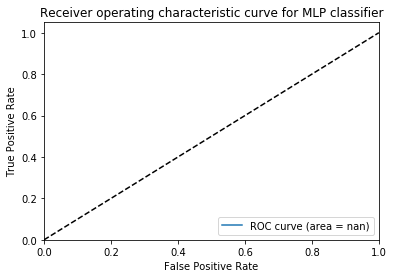

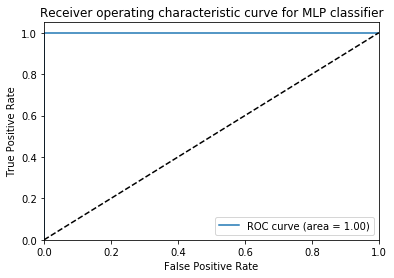

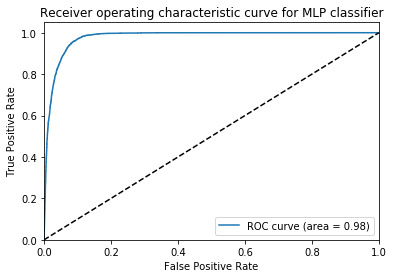

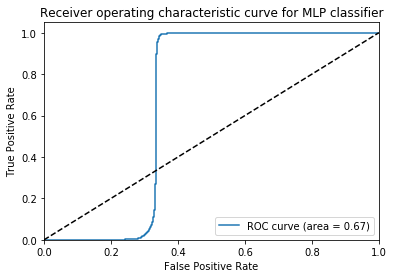

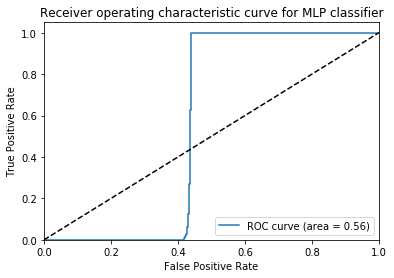

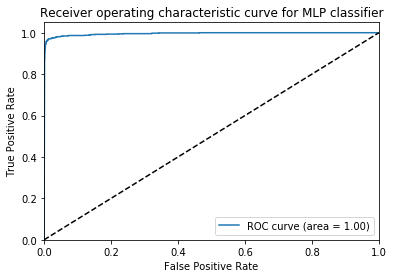

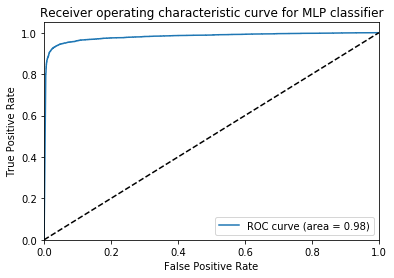

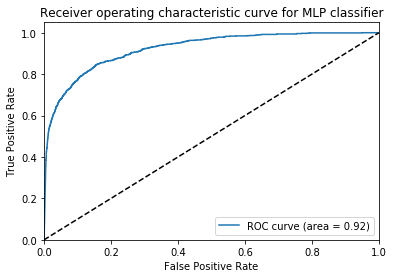

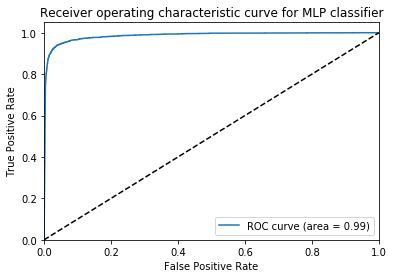

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

Y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8])
n_classes = 9

x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

clf = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(200, ), learning_rate_init=0.001, random_state=5, early_stopping=True))
y_score = clf.fit(x_train, Y_train).predict_proba(x_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for MLP classifier')
    plt.legend(loc="lower right")
    plt.show()

## Support Vector Machine Classifier

In [11]:
from sklearn.svm import SVC
svc = SVC(C=18, max_iter=150, degree=10).fit(X_train, y_train)
print('Accuracy for Support Vector Machine traning:', accuracy_score(y_train, svc.predict(X_train)))
print('Accuracy for Support Vector Machine testing:', accuracy_score(y_test, svc.predict(X_test)))
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy for Support Vector Machine traning: 0.8221822043681027
Accuracy for Support Vector Machine testing: 0.8069381598793364
[[ 540   16    0    0    0   11    1    0    0]
 [  21 4002  787    0    0    2    2    0    0]
 [   0  672 1451  255    1    1    3    0    0]
 [   0   59  179  554    6    3    0    0    0]
 [   0    0    0    5  873    3    0    0    0]
 [  18    0    5    6    1 4114   49    6    7]
 [   1    3    0   10    0  255  539   54    0]
 [  44    1    0    0    0  527  319 1612   38]
 [  33    0    0    0    0   74   16   90 1295]]


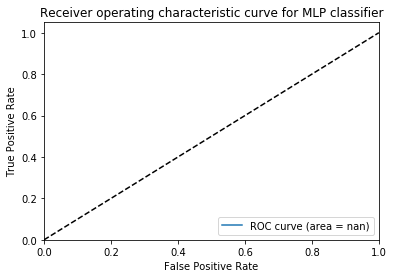

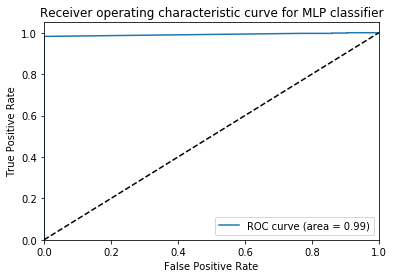

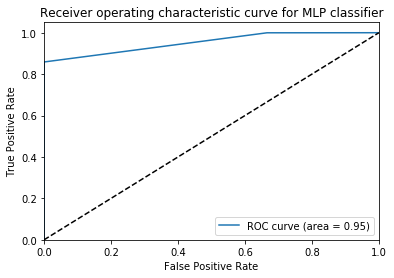

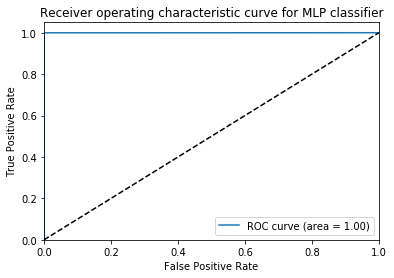

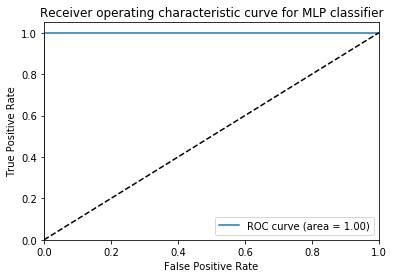

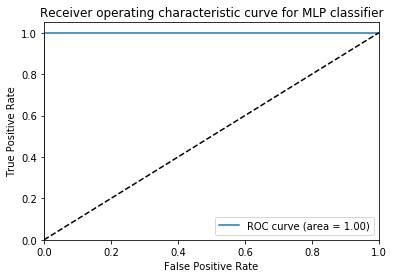

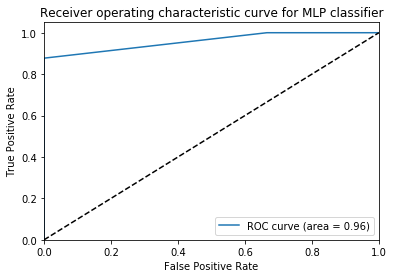

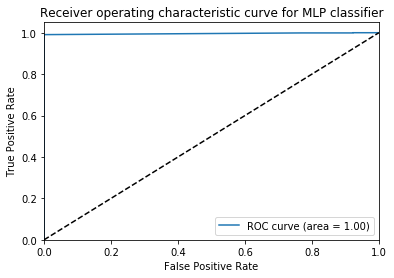

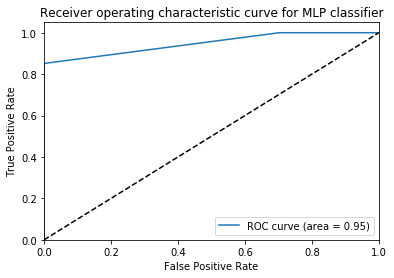

In [12]:
clf = OneVsRestClassifier(SVC(C=18, max_iter=150, degree=9))
y_score = clf.fit(x_train, Y_train).decision_function(x_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for MLP classifier')
    plt.legend(loc="lower right")
    plt.show()

## Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=9, random_state=45).fit(X_train, y_train)
print('Accuracy for Decision tree training:', accuracy_score(y_train, tree.predict(X_train)))
print('Accuracy for Decision tree testing:', accuracy_score(y_test, tree.predict(X_test)))
y_pred=tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy for Decision tree training: 1.0
Accuracy for Decision tree testing: 0.999892264598147
[[ 568    0    0    0    0    0    0    0    0]
 [   0 4814    0    0    0    0    0    0    0]
 [   0    0 2383    0    0    0    0    0    0]
 [   0    0    0  801    0    0    0    0    0]
 [   0    0    0    0  881    0    0    0    0]
 [   0    0    0    0    0 4206    0    0    0]
 [   0    0    0    0    0    1  861    0    0]
 [   0    0    0    0    0    0    0 2540    1]
 [   0    0    0    0    0    0    0    0 1508]]


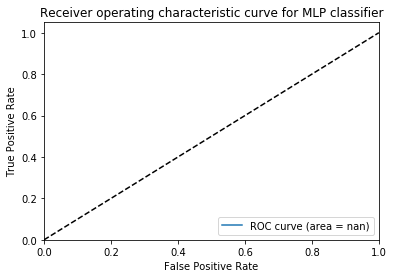

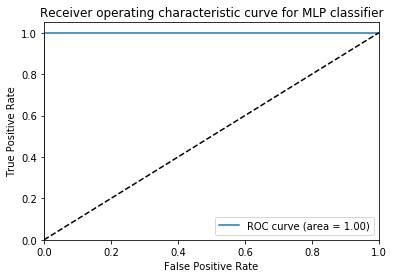

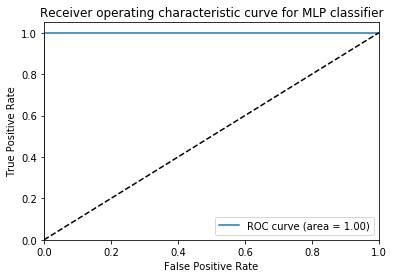

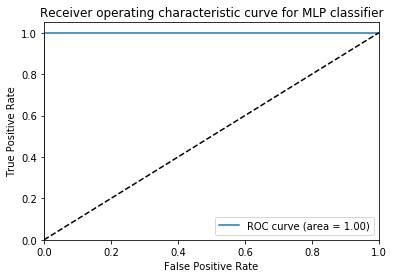

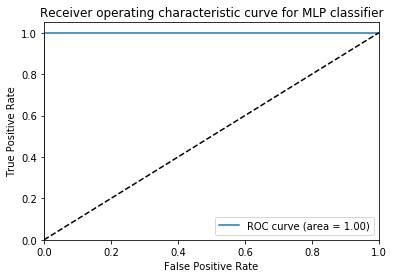

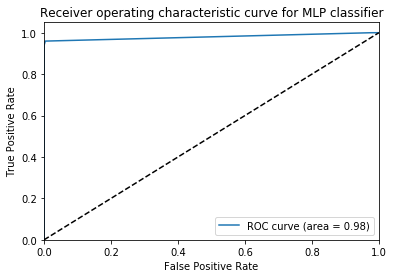

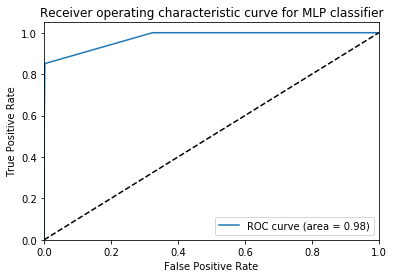

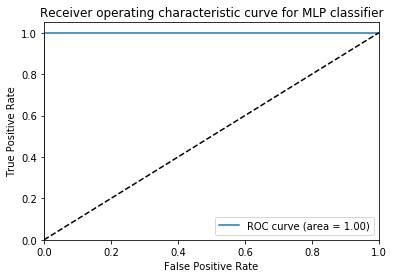

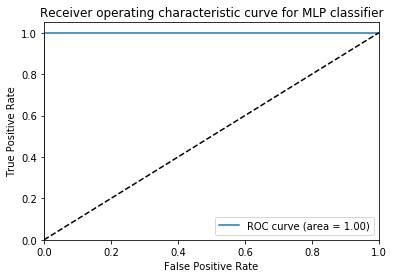

In [14]:
clf = OneVsRestClassifier(DecisionTreeClassifier(max_depth=10,max_leaf_nodes=9, random_state=45))
y_score = clf.fit(x_train, Y_train).predict_proba(x_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for MLP classifier')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=19).fit(X_train, y_train)
print('Accuracy for Random Forest training:', accuracy_score(y_train, rfc.predict(X_train)))
print('Accuracy for Random Forest testing:', accuracy_score(y_test, rfc.predict(X_test)))
y_pred=rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy for Random Forest training: 1.0
Accuracy for Random Forest testing: 0.9917582417582418
[[ 567    1    0    0    0    0    0    0    0]
 [   0 4814    0    0    0    0    0    0    0]
 [   0    0 2376    2    1    0    4    0    0]
 [   0    0   14  772    5    8    1    0    1]
 [   0    0    3    5  873    0    0    0    0]
 [   0    0    4    7    1 4166   24    4    0]
 [   0    0    7    9    1   21  814    9    1]
 [   0    0    2    0    0    0    4 2533    2]
 [   0    0    0    0    2    0    0   10 1496]]


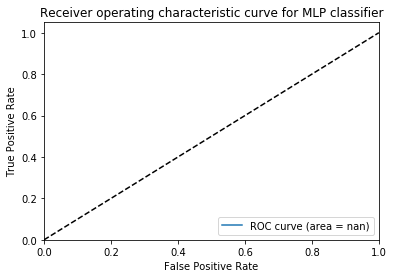

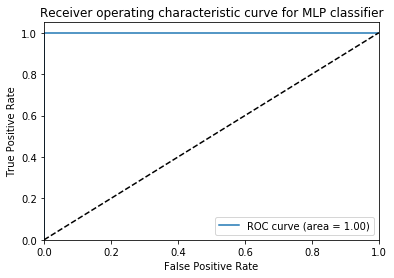

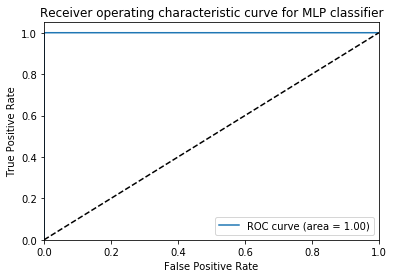

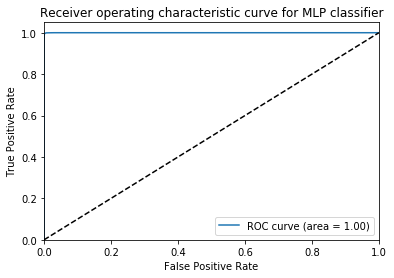

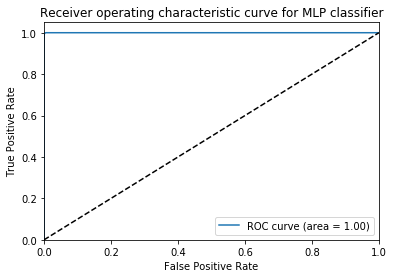

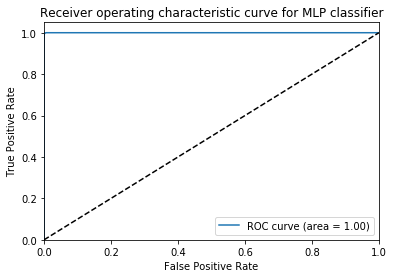

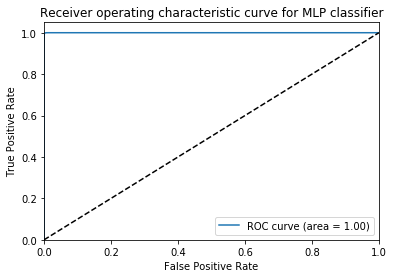

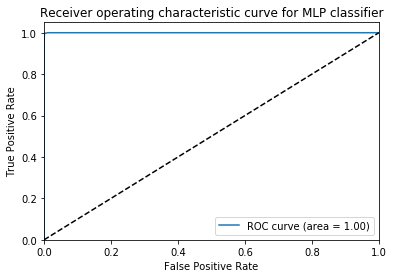

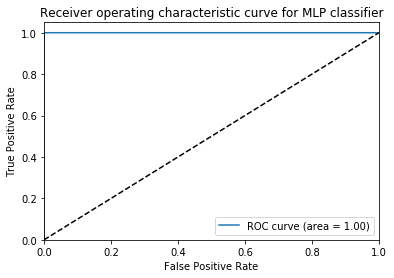

In [16]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=19))
y_score = clf.fit(x_train, Y_train).predict_proba(x_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for MLP classifier')
    plt.legend(loc="lower right")
    plt.show()

## Gradient Boosting Classifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
print('Accuracy for Gradient Boost training:', gbc.score(X_train, y_train))
print('Accuracy for Gradient Boost testing:', gbc.score(X_test, y_test))
y_pred=gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy for Gradient Boost training: 1.0
Accuracy for Gradient Boost testing: 0.999892264598147
[[ 568    0    0    0    0    0    0    0    0]
 [   0 4814    0    0    0    0    0    0    0]
 [   0    0 2383    0    0    0    0    0    0]
 [   0    0    0  801    0    0    0    0    0]
 [   0    0    0    0  881    0    0    0    0]
 [   0    0    0    0    0 4206    0    0    0]
 [   0    0    0    0    0    1  861    0    0]
 [   0    0    0    0    0    0    0 2540    1]
 [   0    0    0    0    0    0    0    0 1508]]


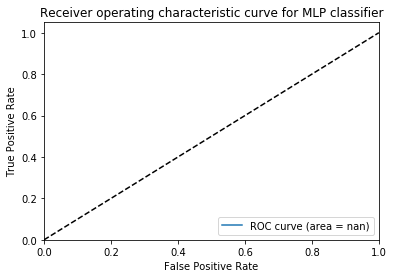

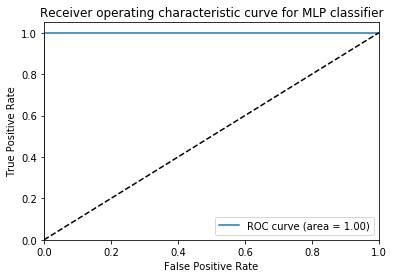

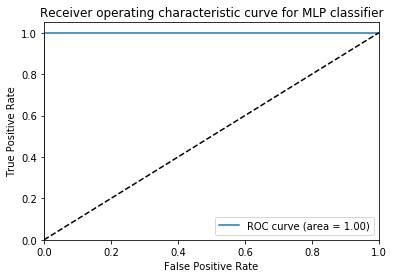

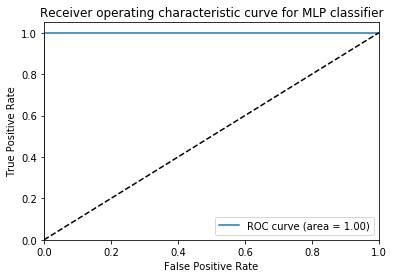

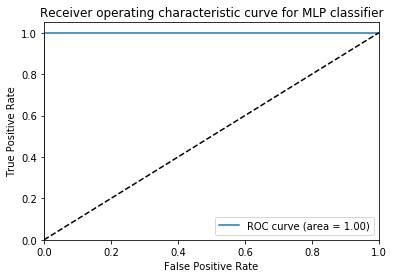

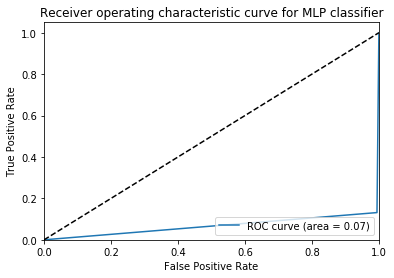

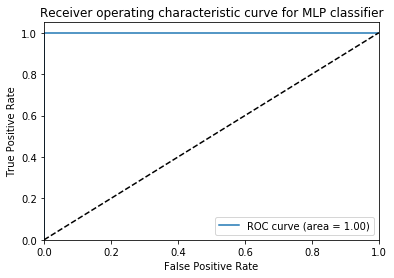

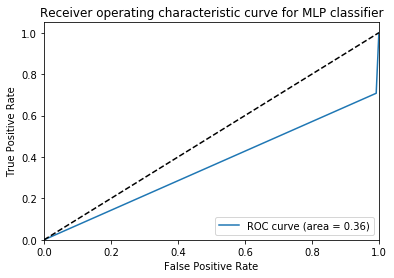

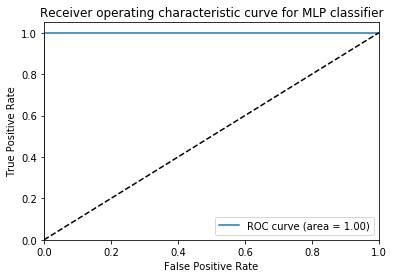

In [18]:
clf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))
y_score = clf.fit(x_train, Y_train).predict_proba(x_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Ploting of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for MLP classifier')
    plt.legend(loc="lower right")
    plt.show()

## KNN Classifier

In [0]:
#from sklearn.neighbors import KNeighborsClassifier
#knnclass = KNeighborsClassifier(n_neighbors=4, p=3)
#knn = knnclass.fit(X_train, y_train)
#print('accuracy for train knn:', accuracy_score(y_train, knn.predict(X_train)))
#print('accuracy for test knn:', accuracy_score(y_test, knn.predict(X_test)))

KNN takes too long time to converge.

# Comparison
KNN model doesn't converge. Accuracy for Support Vector Machine model is relatively lower than the rest of the models. Gradient Boosting, Decision Tree and Random Forest models give the same high accuracy followed by MLP.